This the HAM10000 ("Human Against Machine with 10000 training images") dataset.It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :
1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

Here I will try to detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.
We will move step by step process to classify 7 classes of cancer.

In this kernel I have followed following 14 steps for model building and evaluation which are as follows :

Step 1: Importing Essential Libraries

Step 2: Loading data and Making labels

Step 3: Train Test Split

Step 4: Exploratory data analysis (EDA)

Step 5: Model Building (CNN)

Step 6: Setting Optimizer & Annealing

Step 7: Fitting the model

Step 8: Model Evaluation

# Step 1: Importing Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading data and Making labels

In [ ]:
path='/content/drive/MyDrive/hmnist_28_28_RGB.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(path)

In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Step 3: Train Test Split

In [ ]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

2003


In [ ]:
df.label.unique()

array([4, 6, 2, 5, 0, 1, 3])

In [ ]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [ ]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Step 4: Exploratory Data Analysis and Preprocessing

<Axes: ylabel='count'>

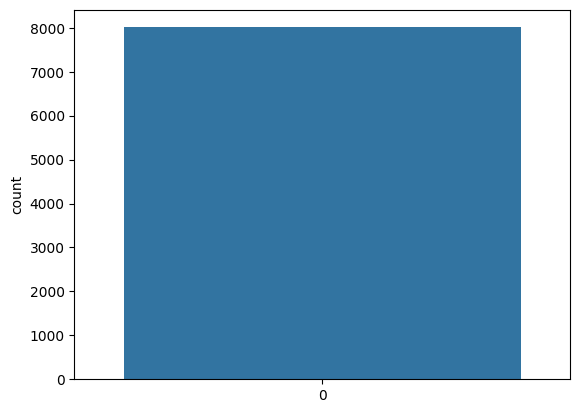

In [ ]:
import seaborn as sns

sns.countplot(train_set['label'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

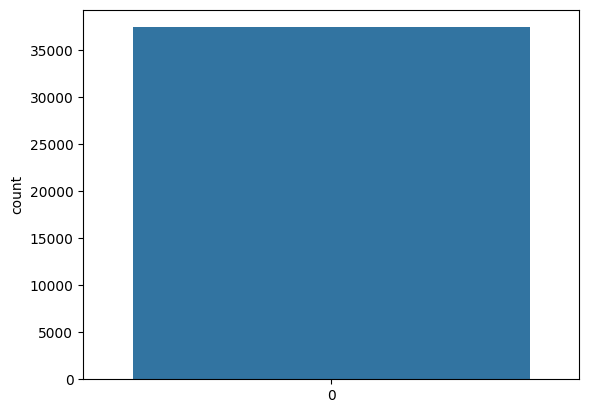

In [ ]:
sns.countplot(y_train)

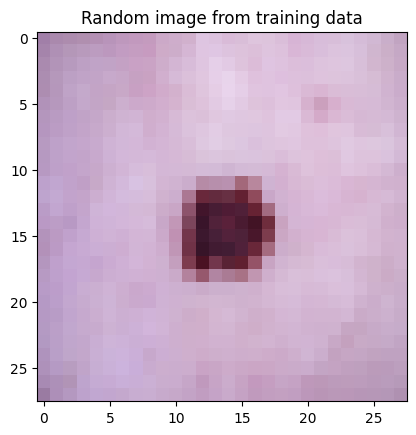

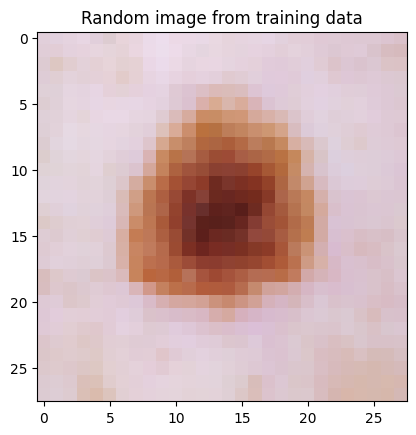

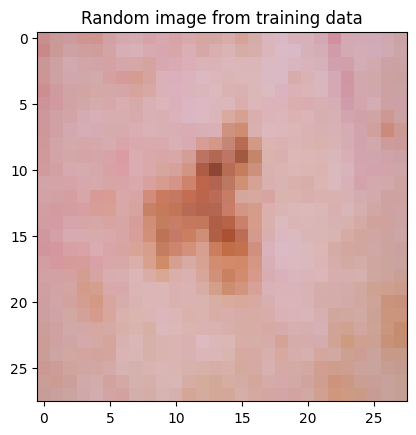

In [ ]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# Step 5: Model Building (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

# Step 6: Setting Optimizer & Annealing

---



In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


# Step 7: Fitting the model

In [ ]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
234/234 [==============================] - 16s 14ms/step - loss: 1.2821 - accuracy: 0.5278 - val_loss: 1.8535 - val_accuracy: 0.3734
Epoch 2/50
234/234 [==============================] - 2s 9ms/step - loss: 0.5030 - accuracy: 0.8313 - val_loss: 1.2869 - val_accuracy: 0.4436
Epoch 3/50
234/234 [==============================] - 2s 10ms/step - loss: 0.3037 - accuracy: 0.8959 - val_loss: 1.3383 - val_accuracy: 0.4655
Epoch 4/50
234/234 [==============================] - 2s 9ms/step - loss: 0.2411 - accuracy: 0.9164 - val_loss: 1.2462 - val_accuracy: 0.4900
Epoch 5/50
234/234 [==============================] - 2s 10ms/step - loss: 0.1931 - accuracy: 0.9330 - val_loss: 0.7715 - val_accuracy: 0.6581
Epoch 6/50
234/234 [==============================] - 2s 10ms/step - loss: 0.1593 - accuracy: 0.9445 - val_loss: 0.8227 - val_accuracy: 0.6344
Epoch 7/50
234/234 [==============================] - 2s 11ms/step - loss: 0.1568 - accuracy: 0.9451 - val_loss: 0.8470 - val_accuracy: 0.6208


# Step 8: Model Evaluation

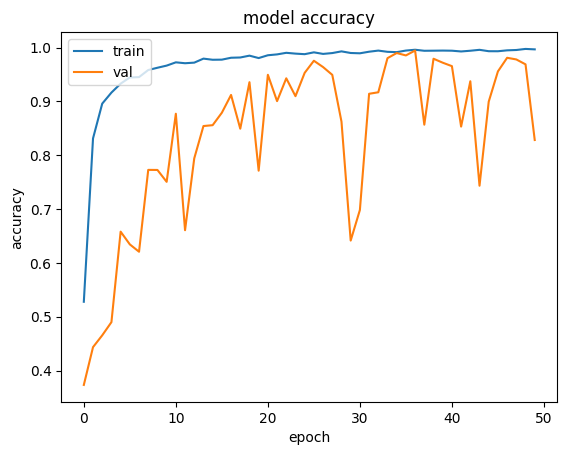

In [ ]:
#plot of accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

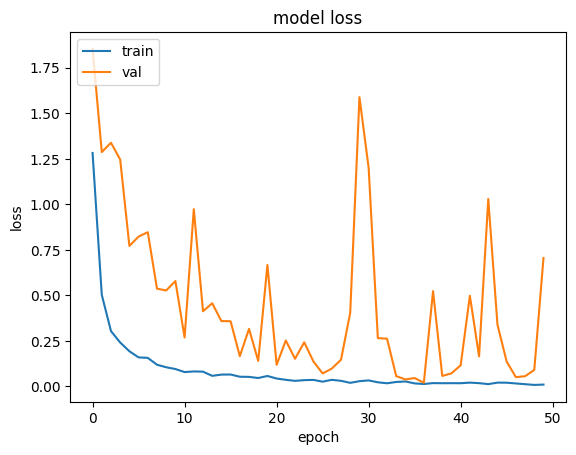

In [ ]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('Skin Cancer.h5')


In [ ]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 5ms/step - loss: 2.0276 - accuracy: 0.6945


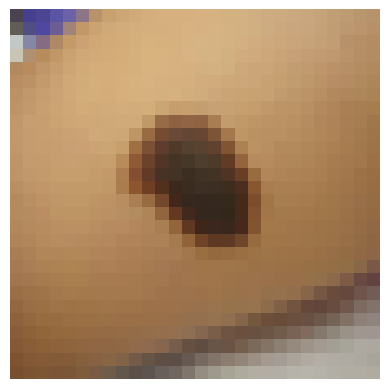

1/1 [==============================] - 0s 265ms/step
[1.2108380e-08 8.9141089e-08 2.4244223e-08 4.0486363e-08 9.9997342e-01
 1.6198710e-06 2.4758443e-05]
('nv', ' melanocytic nevi')


In [ ]:
# Import the necessary libraries
import PIL
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = PIL.Image.open('/kaggle/input/testimage/3.jpeg')
image = image.resize((28, 28))

# Convert the image to a NumPy array
img = np.array(image)

# Reshape the array if needed
#img = img.reshape(-1, 28, 28, 3)  # Uncomment this line if needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Rest of your code
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


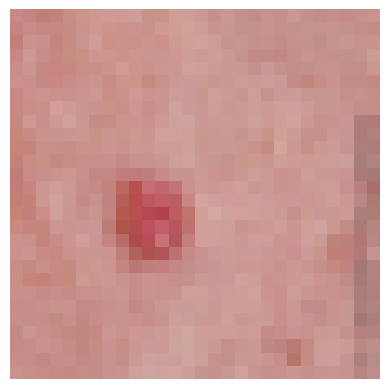

1/1 [==============================] - 0s 42ms/step
[1.9904843e-04 5.1731680e-04 7.9386833e-04 2.2453361e-05 9.9665135e-01
 2.8109495e-04 1.5349414e-03]
('nv', ' melanocytic nevi')


In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO  # Import BytesIO

# Define the URL of the image you want to load
image_url = "https://m4b6f3p8.rocketcdn.me/app/uploads/2021/04/basalCellCarcinomaBCC_6163_lg.jpg"

# Load the image from the URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))  # Use BytesIO to read the content
image = image.resize((28, 28))

# Convert the image to a NumPy array
img = np.array(image)

# Reshape the array if needed
# img = img.reshape(-1, 28, 28, 3)  # Uncomment this line if needed

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Rest of your code
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])


In [ ]:
from google.colab import drive
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display

# Mount Google Drive
drive.mount('/content/drive')

# Load the model
model = load_model('/content/drive/MyDrive/path_to_your_model.h5')

# Define the class labels
classes = {
    0: 'Melanocytic nevi',
    1: 'Melanoma',
    2: 'Benign keratosis-like lesions',
    3: 'Basal cell carcinoma',
    4: 'Actinic keratoses',
    5: 'Vascular lesions',
    6: 'Dermatofibroma'
}

# Function to handle image upload and prediction
def predict_image(image_path):
    # Load the image
    image = Image.open(image_path)
    image = image.resize((28, 28))  # Resize the image to match the input shape of the model
    image = np.array(image)  # Convert the image to a numpy array
    image = image.reshape(1, 28, 28, 3)  # Reshape the image to match the input shape of the model

    # Normalize the image
    image = image / 255.0

    # Make predictions
    predictions = model.predict(image)
    class_index = np.argmax(predictions)
    class_label = classes[class_index]

    # Print the predicted class label
    print("Predicted class: ", class_label)

# Create file upload widget
upload_widget = widgets.FileUpload(description='Upload Image', multiple=False)

# Create button widget
button = widgets.Button(description='Predict')

# Function to handle button click event
def on_button_clicked(b):
    # Get the uploaded image
    uploaded_image = upload_widget.value
    image_path = list(uploaded_image.keys())[0]

    # Predict the image
    predict_image(image_path)

# Register button click event
button.on_click(on_button_clicked)

# Display the widgets
display(upload_widget, button)